In [1]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime
import duckdb
from glob import glob
from pathlib import Path
from collections import Counter
import sys, subprocess
import time
import re

calling ds_preamble..
calling ds_helper...


# pathlib module

In [2]:
# open a directory for testing purposes
Path.cwd()
test_path = Path(Path.cwd(), 'testing_code_pathlib') # NOTE: we need to explicitly pass Path.cwd()! Otherwise, the current directory might change later!
test_path
test_path.mkdir(parents=True, exist_ok=True)

PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes')

PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib')

## class methods (top-level functions)
- not object method!

In [3]:
Path.cwd() # os.get_cwd
!pwd
Path.home()

# os.chdir(str(Path.home() / 'Downloads')) # if want to change to other directories, we still need to use `os.chdir`!
# os.chdir(str(Path('~/Downloads').expanduser())) # NOTE: we have to expand `~`! Also, `str` isn't necessary!
# os.chdir(Path.home()) # can directly give Path object
# os.chdir(Path('~/Downloads').expanduser()) # can directly give Path object



PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes')

/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes


PosixPath('/Users/whlin')

## create a path object directly from string

In [4]:
# NOTE: even in Windows, we can still use `/` as path separator. The forward slash operator is used independently of the actual path separator on the platform

# M1
Path("~/Downloads/Hello/World")
# M2
Path.home() / 'Downloads' / 'Hello' / 'World' # `/` has been overloaded 
# M3
Path.home().joinpath('Downloads','Hello', 'World')
# M4: join two path as well. BEST method, since M1 sometimes can't be used, because the components may be variables 
Path("~/Downloads", "hello", 'test.txt')

PosixPath('~/Downloads/Hello/World')

PosixPath('/Users/whlin/Downloads/Hello/World')

PosixPath('/Users/whlin/Downloads/Hello/World')

PosixPath('~/Downloads/hello/test.txt')

## open files with `open` method instead of `open` function

In [5]:
# Path class has an `open`` method, which is the same as the built-in open function!

# path = Path("~/testing.txt").expanduser()
path = Path(test_path, 'testing.txt')
path
if not path.exists(): # if file not already exists
    path.write_text('hello\nworld')

with path.open('r') as f: # same as with open("testing.txt", r) as f:
    for line in f:
        print(line)

PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/testing.txt')

overwritting...


## access file content without `open`, by `{read, write}_text`

In [6]:
# return as a string
Path(path).read_text() # get all the text inside. Same as `f.read()`
Path(path).write_text("overwritting...") # this will erase the stuff in the original file... Same as `f.write`

'overwritting...'

15

## Path object attributes and methods

In [7]:
# Note that .parent returns a new Path object, whereas the other properties return strings. This means for instance that .parent can be chained as in the last example or even combined with / to create completely new paths:
# path = Path("~/Downloads/Hello/world/my_test.txt")

print("Path object attributes...")
for path in [Path("~/Downloads/Hello/world/my_test.txt"), Path('~/my/dir')]:
    print(f'====for path {path}====')
    print(f"{path = }")
    print(f"{path.name = }")
    print(f"{path.parent = }")
    print(f"{path.parent.parent = }")
    print(f"{path.stem = }")
    print(f"{path.suffix = }")
    print(f"{path.anchor = }")
    print(f"{path.root = }")
    print(f"{path.parent / ('world' + path.suffix)  = }")
    # change to another file 
    print('====end====')

print("\n\nPath object methods...")
# methods of Path object 
path = Path("~/Downloads/Hello/World/good.txt")
for p in [path, path.cwd()]:
    print(f'====for path {path}====')
    print(f'for path {p}:')
    print(f"{p.cwd() / 'textfiles' = }") # '/' has been overloaded
    print(f"{p.home() = }") # fall back to `Path.home()`
    print(f"{p.cwd().exists() = }")
    print(f"{p.exists() = }")
    print(f"{p.is_dir() = }")
    print(f"{p.is_file() = }")
    print(f"{p.is_absolute() = }")
    print(f"{p.with_name('abc.png')  = }")
    print(f"{p.with_stem('abc') = }")
    print(f"{p.with_suffix('.png') = }")
    # p.chmod()
    print('====end====')

Path object attributes...
====for path ~/Downloads/Hello/world/my_test.txt====
path = PosixPath('~/Downloads/Hello/world/my_test.txt')
path.name = 'my_test.txt'
path.parent = PosixPath('~/Downloads/Hello/world')
path.parent.parent = PosixPath('~/Downloads/Hello')
path.stem = 'my_test'
path.suffix = '.txt'
path.anchor = ''
path.root = ''
path.parent / ('world' + path.suffix)  = PosixPath('~/Downloads/Hello/world/world.txt')
====end====
====for path ~/my/dir====
path = PosixPath('~/my/dir')
path.name = 'dir'
path.parent = PosixPath('~/my')
path.parent.parent = PosixPath('~')
path.stem = 'dir'
path.suffix = ''
path.anchor = ''
path.root = ''
path.parent / ('world' + path.suffix)  = PosixPath('~/my/world')
====end====


Path object methods...
====for path ~/Downloads/Hello/World/good.txt====
for path ~/Downloads/Hello/World/good.txt:
p.cwd() / 'textfiles' = PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/textfiles')
p.home() = Po

## rename file/directory and create file/directory

In [12]:
Path.cwd()
# ------------------------------- create/rename files ------------------------------- #
Path("testing.txt").write_text("hello world!") # make a new file first so that we can rename it
# Path("testing.txt").with_stem("test") # get a Path object withe a name name. Will not do rename

if not Path("test.txt").exists: # to avoid replacing an existing file 
    Path("testing.txt").replace("test.txt") # get a Path object withe a name. Will do rename. NOTE: if there exists a file with the same replaced name, then the old file will be removed as well! Be extra careful about it!

# usually, we just want to change the name of a file. In this case, use with_stem, which will return a Path with the same directory as the original
path = Path("testing.txt")
path.replace(path.with_stem("testxx"))
# ---------------------------------------------------------------------------- #


# -------------------------- create/rename directory ------------------------- #
# create directory
path = Path('my/path/to/dir')
Path(path).mkdir(mode=511, parents=True, exist_ok=True) # create a new directory 

# rename directory
# change the name of the directory
# M1: bad
# path.rename("./my/path/to/NEW_dir") 
# M2: good
path = path.rename(path.with_stem('NEW_dir'))

# this is wrong.. This will remove the given dir, and then create a dir in the home directory 
# path.rename("NEW_dir") 

PosixPath('/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes')

12

PosixPath('testxx.txt')

## glob and rglob (recursive glob), iterdir for file iteration
- optionally, can use `path.iterdir()`. 
    - we use `Path.iterdir` instead of `os.listdir` in `Pathlib`!
    - Even better, use `Path.glob('*')`

In [31]:
sorted(Path().rglob('*.ipynb')) # search current directory recursively for *.py files
sorted(Path().glob('*.py')) # search current directory for *.py files
for x in Path().expanduser().glob('*.ipynb'): # very often, we can't use `~` when we iterate a directory...
    print(x)

path = Path.home()
for f in path.iterdir(): # same as path.glob(*)
    print(f.name, end=' ')

[PosixPath('file_manage.ipynb'), PosixPath('py_topics.ipynb')]

[]

file_manage.ipynb
py_topics.ipynb
.Rhistory .eclipse .config Music .julia .condarc out.txt play_.txt .DS_Store .CFUserTextEncoding my_out.txt bin less .bashrc .local .psql_history Pictures playing.txt testing.txt test_rglob .zprofile DM_notes.pdf .zsh_history .ipython Desktop Library .matplotlib .lesshst Parallels miniforge3 seaborn-data .emacs.d scikit_learn_data .cups .bash_sessions Public NEW_dir testttt.txt play.txt .vscode-R .RData OneDrive - HKUST Connect my Applications (Parallels) Movies d~ .emacs Applications .emacs~ .Rapp.history .Trash test.txt .ipynb_checkpoints .tldrc .jupyter .keras hello .vscode-insiders .pydataset Documents sys_info_page.html error.txt .vscode .bash_profile testxx.txt Downloads .python_history .gitconfig d .bash_history .viminfo .zsh_sessions My Drive .conda ls-output.txt 

## self-defined functions

In [39]:
def count_suffix(path):
    # count the extension of the files in a directory
    return pd.Series(
        Counter(p.suffix for p in Path(path).expanduser().glob('*'))
        ).sort_values(ascending=False)
    
# path = '~/Downloads'
# path = Path.cwd()
path = Path.home() / 'Downloads'
# count_suffix(path)
count_suffix(Path.home())

            60
.txt        11
.pdf         1
.d           1
.history     1
.html        1
dtype: int64

### create dir, directory tree functions

In [51]:
def create_dir(path, n_dir=3, n_doc=4):
    # in the given directory `path`, create dir_{1,2,..n_dir}, and inside each dir_*, create doc_{1,2,..,n_doc}.txt
    path = path.expanduser()
    for i in range(1, n_dir+1):
        # cur_path = Path(path).expanduser().joinpath(f'dir_{i}')
        cur_path = Path(path, f'dir_{i}')
        # print(cur_path)

        cur_path.mkdir(parents=True, exist_ok=True)
        
        for j in range(1, n_doc+1):
            Path(cur_path, f'doc_{j}.txt').write_text(f"doc_{j}")

def dir_tree(path):
    path = Path(path).expanduser()
    print(f'- {path}')
    for p in sorted(path.rglob('*')):
        depth = len(p.relative_to(path).parts) 
        spacer = '    '*depth
        print(f'{spacer}- {p.name}')
        # print(p)

def dir_walk(path):
    # print all files in a directory (including subdirectories inside)
    # M1: recursion
    path = Path(path).expanduser()
    for file in sorted(path.iterdir()):
        if file.is_file():
            print(file)
        else:
            dir_walk(file)
    # M2: rglob
    # for file in sorted(path.rglob('*')):
    #     if file.is_file():
    #         print(file)

def unique_path(directory, name_pattern):
    counter = 0
    while True:
        counter += 1
        path = Path(directory, name_pattern.format(counter))
        if not path.exists():
            return path

path = test_path / "new_dir"
create_dir(path)
dir_tree(path)
dir_walk(path)
# path = unique_path(path, 'test{:03d}.txt')
# path
# unique_path(path)

# # path = Path.home()/'playing'
# # path = '~/hello/world'
# path = '~/Desktop/hello/world'
# create_dir(path)

# path = "~/Desktop/hello"
# dir_tree(path)
# path = unique_path('~/Desktop/hello', 'test{:03d}.txt')

# path


- /Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/new_dir
    - dir_1
        - doc_1.txt
        - doc_2.txt
        - doc_3.txt
        - doc_4.txt
    - dir_2
        - doc_1.txt
        - doc_2.txt
        - doc_3.txt
        - doc_4.txt
    - dir_3
        - doc_1.txt
        - doc_2.txt
        - doc_3.txt
        - doc_4.txt
/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/new_dir/dir_1/doc_1.txt
/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/new_dir/dir_1/doc_2.txt
/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/new_dir/dir_1/doc_3.txt
/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/python_notes/testing_code_pathlib/new_dir/dir_1/doc_4.txt
/Users/whlin/Library/Cl

### function to add prefix/suffix to the files of a directory

In [68]:
def add_prefix_suffix(path, ext='', prefix='', suffix=''):
    # ext: filter by extension 
    # use case: add timestamp to each file
    pattern = f'*.{ext}' if ext else '*'

    for file in sorted(Path(path).expanduser().glob(pattern)):
        # print(file)
        new_name = '_'.join(x for x in [prefix,file.stem,suffix] if x)
        # print(file.with_stem(new_name))
        file.rename(file.with_stem(new_name))

# old code 
# def change_file_names(path, ext='png', prefix=None, suffix=None):
#     for file in os.listdir(path):
#         # print(type(file))
#         if file.endswith(ext):
#             new_name = file
#             if prefix:
#                 # new_name = prefix + '_' + new_name
#                 new_name = f'{prefix}_{new_name}'
#             if suffix:
#                 # new_name = new_name + '_' + suffix
#                 new_name = f'{new_name}_{suffix}'
#             print(new_name)
#             os.rename(os.path.join(path, file), os.path.join(path, new_name))


# path = '~/Desktop/hello/world/dir_1'
# path = test_path / "new_dir"
create_dir(path)
add_prefix_suffix(path/'dir_1', prefix='pref', suffix='suff')


In [70]:
def print_file(path, pattern='*' ,start=None, end=None, strip=False, output_path=None):
    res = []
    for file in sorted(Path(path).expanduser().glob(pattern)):
        if strip: 
            res.append(str(file)[start:end].strip()) 
        else: 
            res.append(str(file)[start:end]) 
    if output_path:
        Path(output_path).expanduser().write_text('\n'.join(res))
    print(*res)
    return res

path = '~/Desktop/hello/world/dir_1'
# res = print_file(path, start=-15, end=None)
res = print_file(path, strip=True)

/Users/whlin/Desktop/hello/world/dir_1/pref_doc_1_3.txt /Users/whlin/Desktop/hello/world/dir_1/pref_doc_2_3.txt /Users/whlin/Desktop/hello/world/dir_1/pref_doc_3_3.txt /Users/whlin/Desktop/hello/world/dir_1/pref_doc_4_3.txt


### open files programmatically. This is useful for online grading pdf files

In [71]:
def open_file(filename):
    # open a file using different methods, depending on the os type
    if sys.platform == "win32":
        os.startfile(filename)
    else:
        opener = "open" if sys.platform == "darwin" else "xdg-open"
        subprocess.call([opener, filename])

def open_doc(path, pattern='*', start=None, end=None, recursive=True):
    res = []
    for file in eval(f"sorted(Path(path).expanduser().{'r' if recursive else ''}glob(pattern))"):
        if file.is_file():
            res.append(file)
    print(f"number of documents in the directory = {len(res)}")

    for i in range(start-1, end):
        open_file(str(res[i]))
        time.sleep(0.8)

# path = '~/Desktop/hello/world/dir_1'
path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Academic/Notes of HKCC/HKCC Teaching/SEHH2239/exam things/201'

start=int(input("enter start index(start from 1): "))
end=int(input("enter end index: "))

open_doc(path, pattern='*.pdf', start=start, end=end, recursive=True)



number of documents in the directory = 100


In [75]:
def reverse_lines(file, output_name):
    # reverse the lines of the given file, so that the last line becomes the first line
    file = Path(file).expanduser()
    text = file.read_text() # str type
    # print(text)
    res = '\n'.join(text.strip().split('\n')[::-1])
    # print(res)
    file.with_name(output_name).write_text(res)

# path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/ad-hoc code/file_management/reverse_lines/chinese_text.txt'
path = '../../data/chinese_text.txt'
reverse_lines(path, output_name='chinese_text_reversed.txt')

In [78]:
def add_id(path, works, pattern):
    """ Append each document with an given gid.
        EX: 1234556A_ASM => 1_1234556A_ASM if the document has gid 1 
        When grading group project, we want to append the group id of each student to their submitted p2p files
        - files: id: gip mapping
            19186232A	1
            19011630A	1
            20190501A	1
            20018393A	1
            20208582A	1
            20010776A	2
            20093215A	2
            20009962A	2
            20165160A	2
            20205402A	2
            20013324A	2
            20077332A	3
            20080999A	3
        - directory containing students' work:
            19186232A_my_work.txt
            19011630A_abc.txt
    """
    path = Path(path).expanduser()

    r = re.compile('([1-2][0-9]{7}A)')

    # M1: use dict to get sid:gp pairs
    # d = {}
    #     for line in f:
    #         sid, gp = line.strip().split('\t')
    #         d[sid] = gp

    # M2: use Series with sid as index 
    d = pd.read_csv(
                    path,
                    sep='\t',
                    header=None,
                    names=['sid',
                    'gp_id'],
                    index_col='sid'
                ).squeeze() # .iloc[:,0]
    for f in sorted(Path(works).expanduser().glob(pattern)):
        # extracted_id = f.stem[:9].upper()
        extracted_id = r.findall(f.stem)[0].upper() if r.findall(f.stem) else ''
        # print(extracted_id)
        if extracted_id in d.index:
            # M1: just add extracted d[sid] (the gp id) as prefix
            # print(f.with_stem(f"{d[extracted_id]}_{f.stem}"))
            # f.rename(f.with_stem(f"{d[extracted_id]}_{f.stem}"))

            # M2: just add extracted d[sid] (the gp id) as prefix, and rename the original file to have the sid only
            print(f.with_stem(f"{d[extracted_id]}_{extracted_id}"))
            # f.rename(f.with_stem(f"{d[extracted_id]}_{f.stem}"))

# path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/ad-hoc code/file_management/SEHH2042_addGPID/SEHH2042_stuID+gp.txt'
# works = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/my_notes_py/ad-hoc code/file_management/SEHH2042_work'

path ='../../data/HKCC/SEHH2042/SEHH2042_stuID+gp.txt'
works ='../../data/HKCC/SEHH2042/SEHH2042_work' # directory

add_id(path, works=works, pattern='*.txt')

../../data/HKCC/SEHH2042/SEHH2042_work/1_19011630A.txt
../../data/HKCC/SEHH2042/SEHH2042_work/1_19186232A.txt


['Male', 'Female']

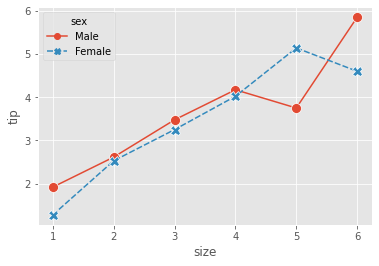

In [88]:
import seaborn as sns
tips = sns.load_dataset('tips')

ax = sns.lineplot(
                data=tips,
                x='size',
                y='tip',
                hue='sex',
                ci=None,
                style='sex',
                markers=True,
                fillstyle='none',
                markeredgecolor=None,
                markersize=10,
            )

handler, label = ax.get_legend_handles_labels();
handler
label
# handler[0].set_fillstyle('none');
# handler[1].set_fillstyle('none');
# ax.legend(handler, label)

In [779]:
def rm_tree(path):
    # recursively remove the directory `path`
    # IMPORTANT: very dangerous!!!
    path = Path(path).expanduser()
    for f in path.rglob('*'):
        if f.is_file():
            f.unlink()
        elif f.is_dir():
            rm_tree(f)
    path.rmdir()

def rm_files(path):
    path = Path(path).expanduser()
    for f in path.rglob('*'):
        if f.is_file():
            f.unlink()
import shutil
path = '~/Desktop/song_list_exercise'
# rm_tree(path)
# rm_files(path)
shutil.rmtree(Path(path).expanduser())

In [782]:
def create_song_list(path):
    # create song list in format
    # gp1_1 - gp2_1 - #1.txt
    path = Path(path).expanduser()
    path.mkdir(parents=True, exist_ok=True)
    for i in range(1, 11):
        path.joinpath(f"gp1_{i} - gp2_{i} - #{i}.txt").write_text('')

def rename_song_list(path, pattern='*'):
    # rename song file to this format
    # 001-gp1_1-gp2_1.txt
    path = Path(path).expanduser()
    for f in path.glob(pattern):
        gp1, gp2, num = [x.strip() for x in f.stem.split('-')]
        num = num[1:].zfill(3)
        new_stem = f"{num}-{gp1}-{gp2}"
        # print(new_stem)
        # print(f.with_stem(new_stem))
        f.rename(f.with_stem(new_stem))

path = '~/Desktop/song_list_exercise'
create_song_list(path)
# rename_song_list(path, pattern='[!.]*')


In [ ]:
def write_file_plus(path):
    

In [15]:
d = [1,2,3]
path = Path('new/myout.txt')
# path.parent.mkdir(parents=True, exist_ok=True)
# with Path(path).open('w') as f:
#     # print("hello")
#     print(d, file=f)

path.write_text(str(d))



FileNotFoundError: [Errno 2] No such file or directory: 'new/myout.txt'